In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [4]:
print("Hello world")


Hello world


In [5]:
image_path = 'D:/UNSW/23T2/MTRN3100/LAB/LAB-10/lab10-6644-group-a-main/test/prelab_image.png'

In [6]:
def show_image(image_path):
    image = cv2.imread(image_path)
    # Convert BGR to RGB 
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Show the image using Matplotlib
    plt.imshow(image_rgb)
    plt.title('Show image in RGB')
    plt.axis('off')  # Turn off axis labels
    plt.show()
    return image_rgb

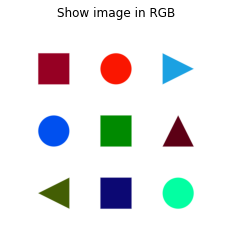

In [7]:
image_rgb = show_image(image_path)

In [8]:
def color_masks_show(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Split the image into its BGR channels
    b, g, r = cv2.split(image)

    # Create blue mask
    blue_mask = cv2.bitwise_and(b, b, mask=((b > r) & (b > g)).astype(np.uint8))

    # Create green mask
    green_mask = cv2.bitwise_and(g, g, mask=((g > r) & (g > b)).astype(np.uint8))

    # Create red mask
    red_mask = cv2.bitwise_and(r, r, mask=((r > g) & (r > b)).astype(np.uint8))

    # Show the original image and masks using Matplotlib
    fig, axes = plt.subplots(1, 4, figsize=(12, 4))

    axes[0].imshow(image_rgb)
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(blue_mask, cmap='gray')
    axes[1].set_title("Blue Shapes")
    axes[1].axis('off')

    axes[2].imshow(green_mask, cmap='gray')
    axes[2].set_title("Green Shapes")
    axes[2].axis('off')

    axes[3].imshow(red_mask, cmap='gray')
    axes[3].set_title("Red Shapes")
    axes[3].axis('off')

    plt.tight_layout()
    plt.show()
    return blue_mask,green_mask,red_mask

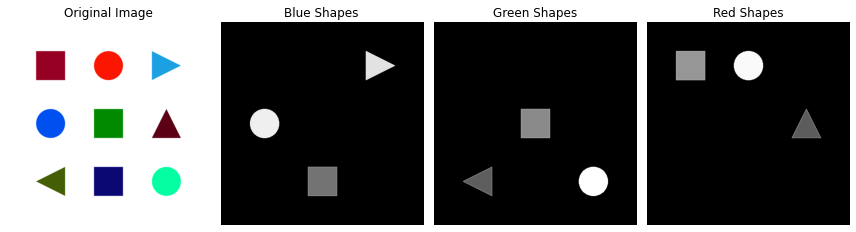

In [9]:
blue_mask,green_mask,red_mask = color_masks_show(image_path)

In [10]:
def analyze_contours(contours):
    for i, contour in enumerate(contours):
        # Compute the moment of the contour
        M = cv2.moments(contour)

        # Compute the area of the contour
        area = M['m00']

        # Display the moment and area information
        print(f"Contour {i+1}:")
        print(f"  Moment: {M}")
        print(f"  Area: {area}")
        print("-------------------------")
    

In [11]:
def find_coutour(blue_mask,green_mask,red_mask,image_rgb):
    combined_mask = cv2.bitwise_or(blue_mask, cv2.bitwise_or(green_mask, red_mask))
    # Find contours in the combined mask
    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Analyze contours and display moment and area information
    analyze_contours(contours)

    # Draw the contours on the original image
    image_with_contours = image_rgb.copy()
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

    # Show the original image with contours using Matplotlib
    plt.imshow(image_with_contours)
    plt.title("Contours")
    plt.axis('off')
    plt.show()
    return contours

Contour 1:
  Moment: {'m00': 5038.0, 'm10': 2216720.0, 'm01': 2216720.0, 'm20': 977376819.6666666, 'm11': 975356800.0, 'm02': 977376819.6666666, 'm30': 431823417960.0, 'm21': 430045800653.3333, 'm12': 430045800653.3333, 'm03': 431823417960.0, 'mu20': 2020019.666666627, 'mu11': 0.0, 'mu02': 2020019.666666627, 'mu30': 6.103515625e-05, 'mu21': -2.86102294921875e-06, 'mu12': -2.86102294921875e-06, 'mu03': 6.103515625e-05, 'nu20': 0.0795864753268816, 'nu11': 0.0, 'nu02': 0.0795864753268816, 'nu30': 3.3879317494484906e-14, 'nu21': -1.58809300755398e-15, 'nu12': -1.58809300755398e-15, 'nu03': 3.3879317494484906e-14}
  Area: 5038.0
-------------------------
Contour 2:
  Moment: {'m00': 6400.0, 'm10': 1792000.0, 'm01': 2816000.0, 'm20': 505173333.3333333, 'm11': 788480000.0, 'm02': 1242453333.3333333, 'm30': 143360000000.0, 'm21': 222276266666.66666, 'm12': 347886933333.3333, 'm03': 549683200000.0, 'mu20': 3413333.3333333135, 'mu11': 0.0, 'mu02': 3413333.333333254, 'mu30': 3.0517578125e-05, 'mu

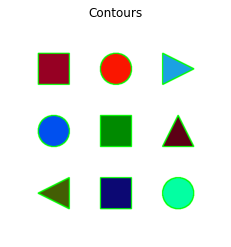

(array([[[434, 400]],
 
        [[433, 401]],
 
        [[430, 401]],
 
        [[429, 402]],
 
        [[427, 402]],
 
        [[426, 403]],
 
        [[424, 403]],
 
        [[423, 404]],
 
        [[422, 404]],
 
        [[421, 405]],
 
        [[420, 405]],
 
        [[418, 407]],
 
        [[417, 407]],
 
        [[415, 409]],
 
        [[414, 409]],
 
        [[409, 414]],
 
        [[409, 415]],
 
        [[407, 417]],
 
        [[407, 418]],
 
        [[405, 420]],
 
        [[405, 421]],
 
        [[404, 422]],
 
        [[404, 423]],
 
        [[403, 424]],
 
        [[403, 426]],
 
        [[402, 427]],
 
        [[402, 429]],
 
        [[401, 430]],
 
        [[401, 433]],
 
        [[400, 434]],
 
        [[400, 446]],
 
        [[401, 447]],
 
        [[401, 450]],
 
        [[402, 451]],
 
        [[402, 453]],
 
        [[403, 454]],
 
        [[403, 456]],
 
        [[404, 457]],
 
        [[404, 458]],
 
        [[405, 459]],
 
        [[405, 460]],
 
        [[407, 4

In [12]:
find_coutour(blue_mask,green_mask,red_mask,image_rgb)

In [34]:
def Persp_trans(src_img,dst_img):
    ## read image and turn it into rgb
    src = cv2.imread(src_img)
    dst = cv2.imread(dst_img)
    src_img_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)  
    dst_img_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    ## show different color mask
    blue_mask,green_mask,red_mask = color_masks_show(src_img)
    ## find contour
    src_contours = find_coutour(blue_mask,green_mask,red_mask,src_img_rgb)
    dst_contours = find_coutour(blue_mask,green_mask,red_mask,dst_img_rgb)
    # Get the source contour points
    source_contour_points = src_contours[0].reshape(-1, 2)

    # Get the target contour points
    target_contour_points = dst_contours[0].reshape(-1, 2)

    # Calculate the perspective transformation matrix
    M = cv2.getPerspectiveTransform(source_contour_points, target_contour_points)

    # Load the source image (original image)
    source_image = cv2.imread('source_image.jpg')

    # Perform the perspective transformation on the source image
    height, width = source_image.shape[:2]
    transformed_image = cv2.warpPerspective(source_image, M, (width, height))

    # Display the transformed image
    cv2.imshow('Transformed Image', transformed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

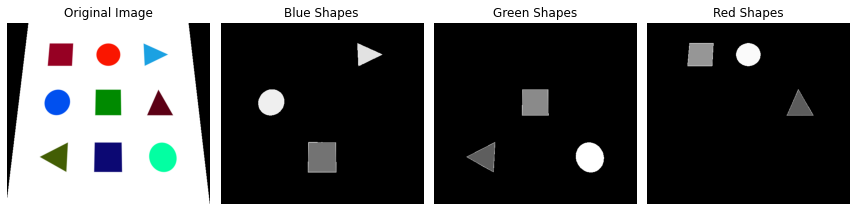

Contour 1:
  Moment: {'m00': 4928.5, 'm10': 2120643.333333333, 'm01': 1837965.6666666665, 'm20': 914289049.5833333, 'm11': 790982406.7916666, 'm02': 687494994.9166666, 'm30': 394963721237.7, 'm21': 341081967784.01666, 'm12': 295920570502.65, 'm03': 257928731700.80002, 'mu20': 1815041.8302420378, 'mu11': 139424.56335759163, 'mu02': 2069857.076462984, 'mu30': -79199.06829833984, 'mu21': -150930.61016976833, 'mu12': 68769.63890969753, 'mu03': 183634.47158813477, 'nu20': 0.07472348466574244, 'nu11': 0.005739971965654116, 'nu02': 0.08521397740609386, 'nu30': -4.644438006484777e-05, 'nu21': -8.850960968048457e-05, 'nu12': 4.032829318664203e-05, 'nu03': 0.0001076879990471504}
  Area: 4928.5
-------------------------
Contour 2:
  Moment: {'m00': 6317.0, 'm10': 1761778.5, 'm01': 2356657.5, 'm20': 494453368.3333333, 'm11': 657285096.6666666, 'm02': 882771862.0, 'm30': 139631448687.25, 'm21': 184479338445.73334, 'm12': 246218847346.5, 'm03': 332004437743.95, 'mu20': 3102492.4330245852, 'mu11': 25

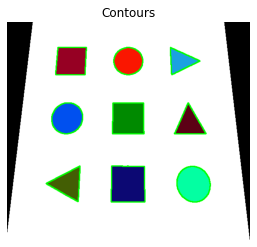

Contour 1:
  Moment: {'m00': 4928.5, 'm10': 2120643.333333333, 'm01': 1837965.6666666665, 'm20': 914289049.5833333, 'm11': 790982406.7916666, 'm02': 687494994.9166666, 'm30': 394963721237.7, 'm21': 341081967784.01666, 'm12': 295920570502.65, 'm03': 257928731700.80002, 'mu20': 1815041.8302420378, 'mu11': 139424.56335759163, 'mu02': 2069857.076462984, 'mu30': -79199.06829833984, 'mu21': -150930.61016976833, 'mu12': 68769.63890969753, 'mu03': 183634.47158813477, 'nu20': 0.07472348466574244, 'nu11': 0.005739971965654116, 'nu02': 0.08521397740609386, 'nu30': -4.644438006484777e-05, 'nu21': -8.850960968048457e-05, 'nu12': 4.032829318664203e-05, 'nu03': 0.0001076879990471504}
  Area: 4928.5
-------------------------
Contour 2:
  Moment: {'m00': 6317.0, 'm10': 1761778.5, 'm01': 2356657.5, 'm20': 494453368.3333333, 'm11': 657285096.6666666, 'm02': 882771862.0, 'm30': 139631448687.25, 'm21': 184479338445.73334, 'm12': 246218847346.5, 'm03': 332004437743.95, 'mu20': 3102492.4330245852, 'mu11': 25

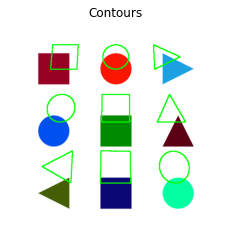

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\imgwarp.cpp:3528: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 4 && dst.checkVector(2, CV_32F) == 4 in function 'cv::getPerspectiveTransform'


In [35]:
src_img_1 = 'D:/UNSW/23T2/MTRN3100/LAB/LAB-10/lab10-6644-group-a-main/test/prelab_image_warped1.png'
src_img_2 = 'D:/UNSW/23T2/MTRN3100/LAB/LAB-10/lab10-6644-group-a-main/test/prelab_image_warped2.png'
dst_img = image_path
Persp_trans(src_img_1,dst_img)